In [2]:
'''
Investigating various feature importance techniques to analyse prediction results of different ML methods
Feature importance techniques:
1) Impurity-based feature importance
2) Permutation feature importance
3) SHAP
'''

import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import impute
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.preprocessing import MinMaxScaler, normalize
from pygam import GAM, s, f, LinearGAM
from sklearn.inspection import permutation_importance
import xgboost
import shap
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load Data

In [4]:
# Set the working directory
os.chdir("N:/WG_ENRI/20_projects/Noise2NAKO/04_data/grid_prediction/3_output")

In [5]:
# Read training and test data
data_training = pd.read_csv('Prediction/Training_data_cvd_noise.csv', sep=',')
data_test = pd.read_csv('Prediction/Test_data_cvd_noise.csv', sep=',')

In [6]:
# distinguish between response and input variables and make training and test data 
# remove unnecessary features 'id', 'x_sw', 'y_sw','x_mp', 'y_mp'

output_variable = 'cvd_mortality_17'
output_path = 'CVD Mortality Rate 2017 incl Noise_XY'

# output_variable = 'ks_Mortality_17'
# output_path = 'Total Mortality Rate 2017 incl XY'

output_path = '../5_results/' + output_path + '/'
coord = True

y = data_training[output_variable]
if coord:
    X = data_training.drop([output_variable, 'ks_Mortality_17', 'id'], axis = 1)   
else:
    X = data_training.drop([output_variable, 'ks_Mortality_17', 'id', 'x_sw', 'y_sw','x_mp', 'y_mp'], axis = 1)
    
pred_y = data_test[output_variable]
if coord:
    pred_X = data_test.drop([output_variable, 'ks_Mortality_17', 'id'], axis = 1)
else:
    pred_X = data_test.drop([output_variable, 'ks_Mortality_17', 'id', 'x_sw', 'y_sw','x_mp', 'y_mp'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

features = X_train.columns

# Impurity-based Feature Importance
When provided by the algorithms (e.g., Random Forest), we show them!

In [383]:
def plot_feature_importances(importances, method, file_path, approach):
        fig, ax = plt.subplots(figsize = (15,5))
        importances.plot.bar(ax=ax)
        ax.set_title('Feature importances using '+ approach +'_' + method)
        if approach == 'MDI':
            ax.set_ylabel("Mean decrease in impurity")
        fig.tight_layout()
        plt.savefig(file_path)
        plt.show()

In [312]:
def Impurity_feature_importance(method, X_train, y_train, output_path):
    
    if method == 'LR':
        model = linear_model.LinearRegression().fit(X_train, y_train)
    elif method == 'LR_Ridge':
        model = linear_model.RidgeCV(cv = 5).fit(X_train, y_train)
    elif method == 'LR_Lasso':
        model = linear_model.LassoCV(cv = 5, random_state=0).fit(X_train, y_train)
    elif method == 'LR_Elastic':
        model = linear_model.ElasticNetCV(cv = 5, random_state=0).fit(X_train, y_train)
    elif method == 'GAM':
        model = GAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9)).fit(X_train, y_train)
    elif method == 'RF':
        model = RandomForestRegressor(n_estimators= 10, max_depth= 10, random_state= 0, max_features='sqrt').fit(X_train, y_train)
    elif method == 'AdaB':
        model = AdaBoostRegressor(n_estimators= 10, random_state=0).fit(X_train, y_train)
    else:
        model = xgboost.XGBRegressor().fit(X_train, y_train)
    
    if method in ['RF' , 'XGBoost', 'AdaB']:
        importances = model.feature_importances_
    
    if method in ['LR', 'LR_Ridge', 'LR_Lasso', 'LR_Elastic']:
        importances = model.coef_/sum(model.coef_)

    variable_importances = pd.Series(importances, index= X_train.columns)
    plot_feature_importances(variable_importances, method, output_path + method + '/' + method + '_MDI_feature_imp_plot', 'MDI')
    
    return importances

### Comparing feature importance of different methods

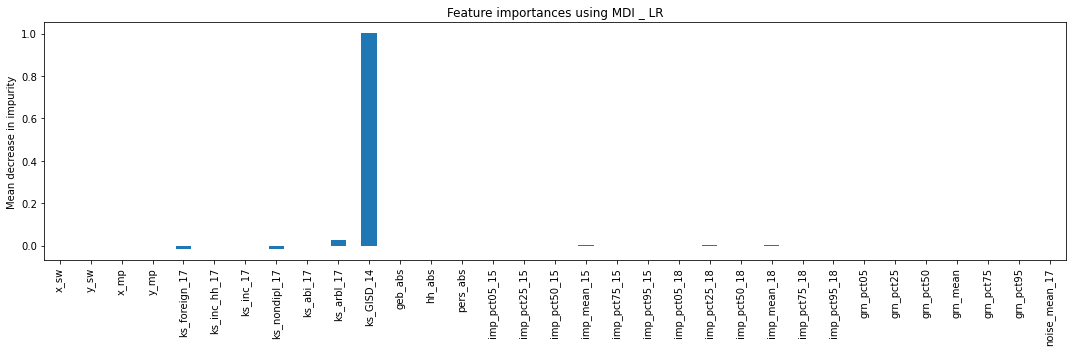

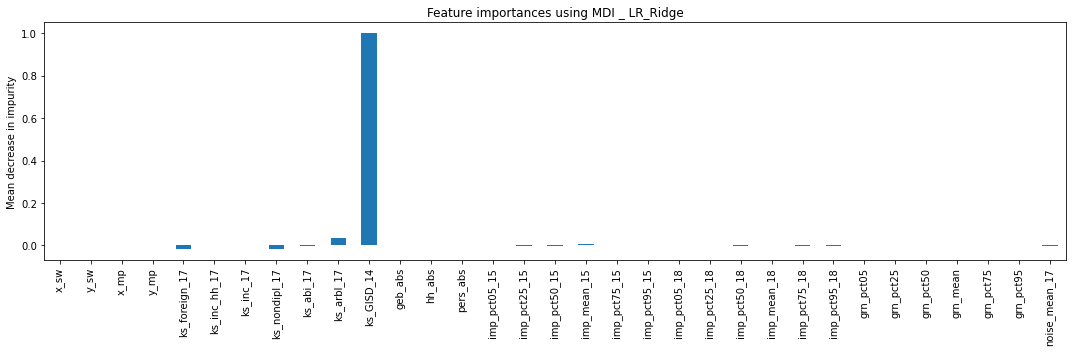

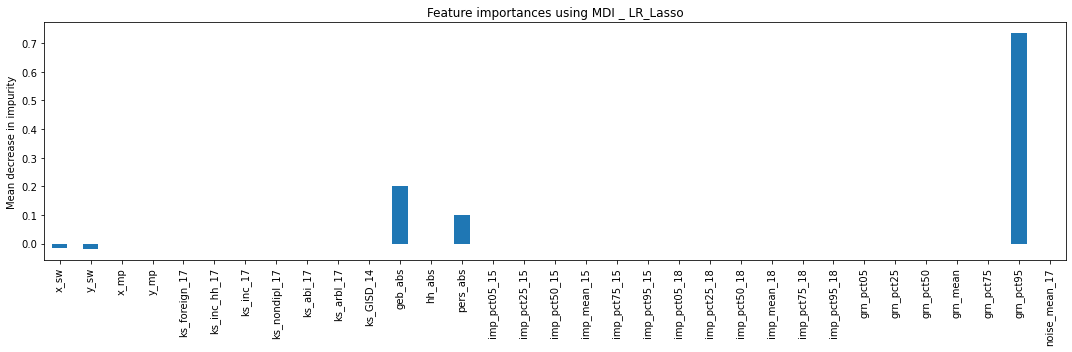

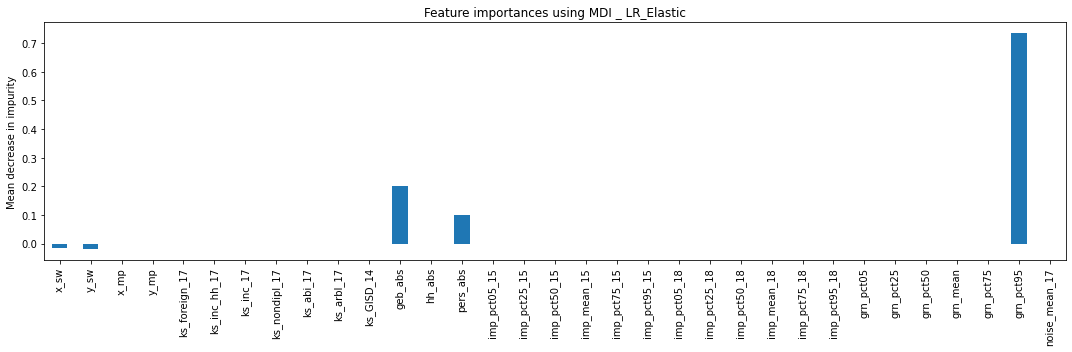

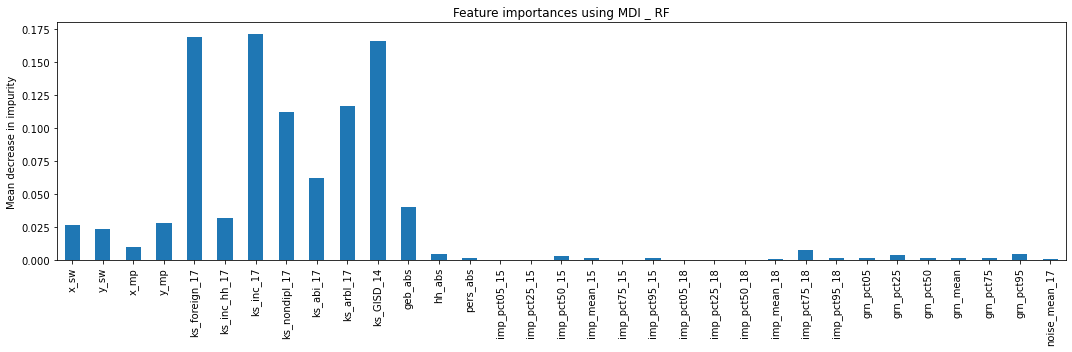

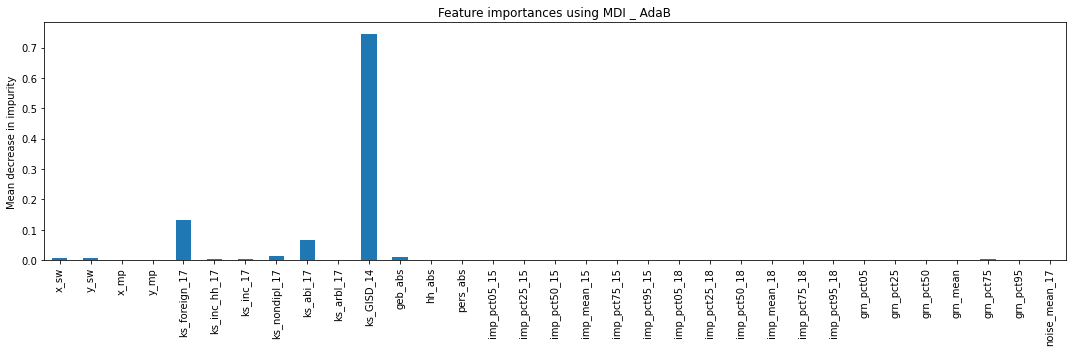

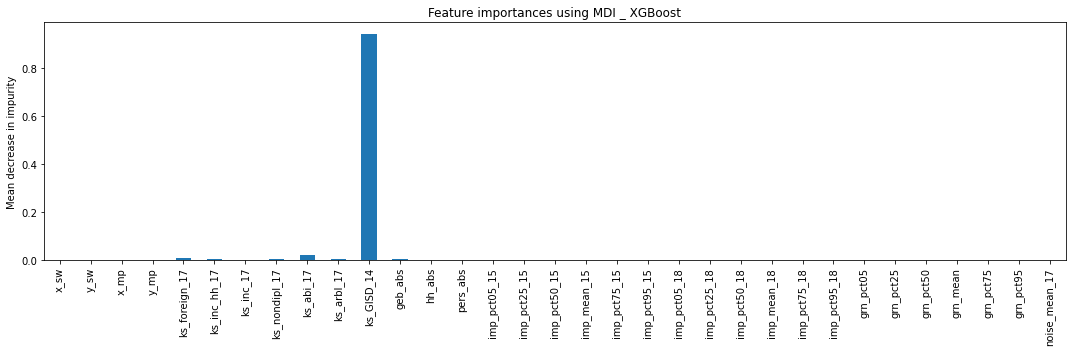

,x_sw,y_sw,x_mp,y_mp,ks_foreign_17,ks_inc_hh_17,ks_inc_17,ks_nondipl_17,ks_abi_17,ks_arbl_17,...,imp_pct75_18,imp_pct95_18,grn_pct05,grn_pct25,grn_pct50,grn_mean,grn_pct75,grn_pct95,noise_mean_17,Method
0,3.520196e-08,-8.073542e-08,3.518035e-08,-8.066285e-08,-0.014169,0.000307,0.000032,-0.017388,-0.001336,0.026014,...,-0.000885,-0.000672,-8.803305e-07,-0.000004,-0.000008,0.000008,7.253029e-07,-0.000005,-0.000121,LR
1,5.828179e-09,-7.596386e-08,1.281985e-08,-9.247092e-08,-0.018367,0.000283,0.000006,-0.018326,-0.002116,0.033908,...,-0.001059,-0.000784,-1.780437e-06,-0.000003,-0.000010,0.000008,2.010639e-06,-0.000006,-0.000574,LR_Ridge
2,-1.687132e-02,-2.008544e-02,-4.768666e-06,-0.000000e+00,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,...,-0.000000,0.000000,0.000000e+00,-0.000000,-0.000000,0.000000,0.000000e+00,0.734977,0.000000,LR_Lasso
3,-1.687477e-02,-2.008902e-02,-4.765608e-06,-0.000000e+00,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,...,-0.000000,0.000000,0.000000e+00,-0.000000,-0.000000,0.000000,0.000000e+00,0.734944,0.000000,LR_Elastic
4,2.651582e-02,2.378076e-02,9.945277e-03,2.851001e-02,0.169500,0.032001,0.171704,0.112469,0.062424,0.117014,...,0.007966,0.001621,1.447292e-03,0.003774,0.001699,0.001280,1.733672e-03,0.004686,0.001134,RF
5,7.788880e-03,6.791532e-03,0.000000e+00,2.088244e-03,0.133229,0.004229,0.005178,0.012684,0.066760,0.001790,...,0.000000,0.000000,0.000000e+00,0.000000,0.000607,0.000000,3.887139e-03,0.000000,0.000000,AdaB
6,1.104105e-03,2.730603e-03,0.000000e+00,0.000000e+00,0.010444,0.003417,0.002097,0.004350,0.020478,0.003682,...,0.000010,0.000052,2.414608e-04,0.000124,0.000211,0.000330,2.358356e-04,0.000188,0.000372,XGBoost


In [321]:
feature_imp = pd.DataFrame(columns = features)
# feature_imp['Method'] = None
# 'LR', 'LR_Ridge', 'LR_Lasso', 'LR_Elastic', 'GAM', 'AdaB', 'XGBoost'

methods = ['LR', 'LR_Ridge', 'LR_Lasso', 'LR_Elastic', 'RF', 'AdaB', 'XGBoost']
for i in methods:
    toAppend_imp = Impurity_feature_importance(i, X_train, y_train, output_path)
    feature_imp = feature_imp.append(pd.DataFrame(toAppend_imp.reshape(1,-1), columns= features), ignore_index=True)

feature_imp['Method'] = methods
feature_imp

In [367]:
def feature_imp_plot_bar(to_plot, methods, font_size, file_path):
    
    fig = plt.figure(figsize=(30,5))
    ax = fig.add_subplot(111)
    
    X_axis = np.arange(len(to_plot.columns))
    for i in range(len(methods)):
        ax.bar(X_axis + i * 0.1, to_plot.iloc[i], 0.1, label=methods[i])
        
    plt.xticks(X_axis, to_plot.columns, rotation='vertical', fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.legend(loc='upper left', fontsize= font_size - 5)
    plt.ylabel('Feature Importance', fontsize = font_size + 5)
    plt.savefig(file_path)
    plt.show()

In [366]:
def feature_imp_plot_scatter(to_plot, methods, font_size, file_path):
    
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(111)
    
    X_axis = np.arange(len(to_plot.columns))
    for i in range(len(methods)):
        ax.scatter(to_plot.columns, to_plot.iloc[i], s = 100, label=methods[i])
        
    plt.xticks(X_axis, to_plot.columns, rotation='vertical', fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.legend(loc='upper left', fontsize= font_size - 5)
    plt.ylabel('Feature Importance', fontsize = font_size + 5)
    plt.savefig(file_path)
    plt.show()

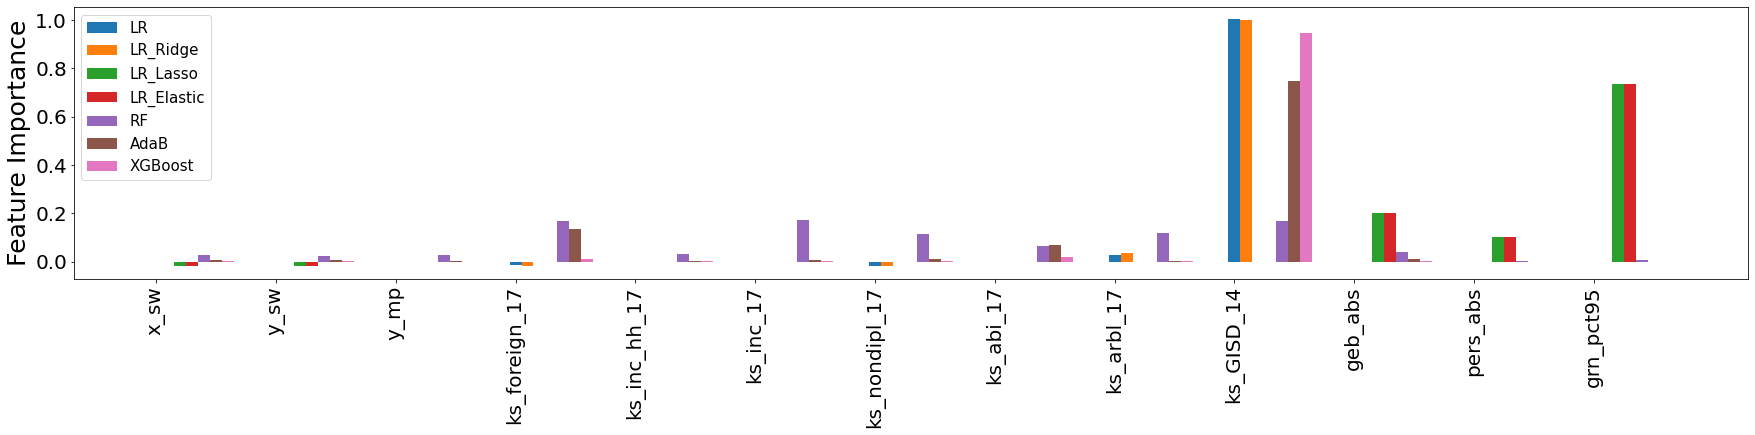

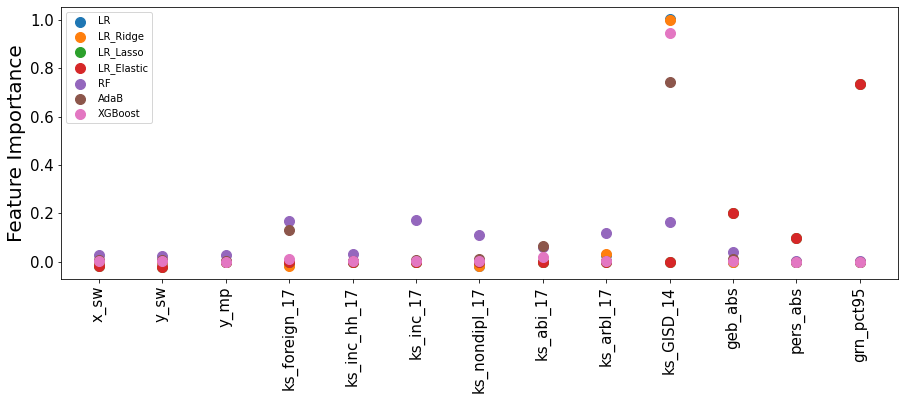

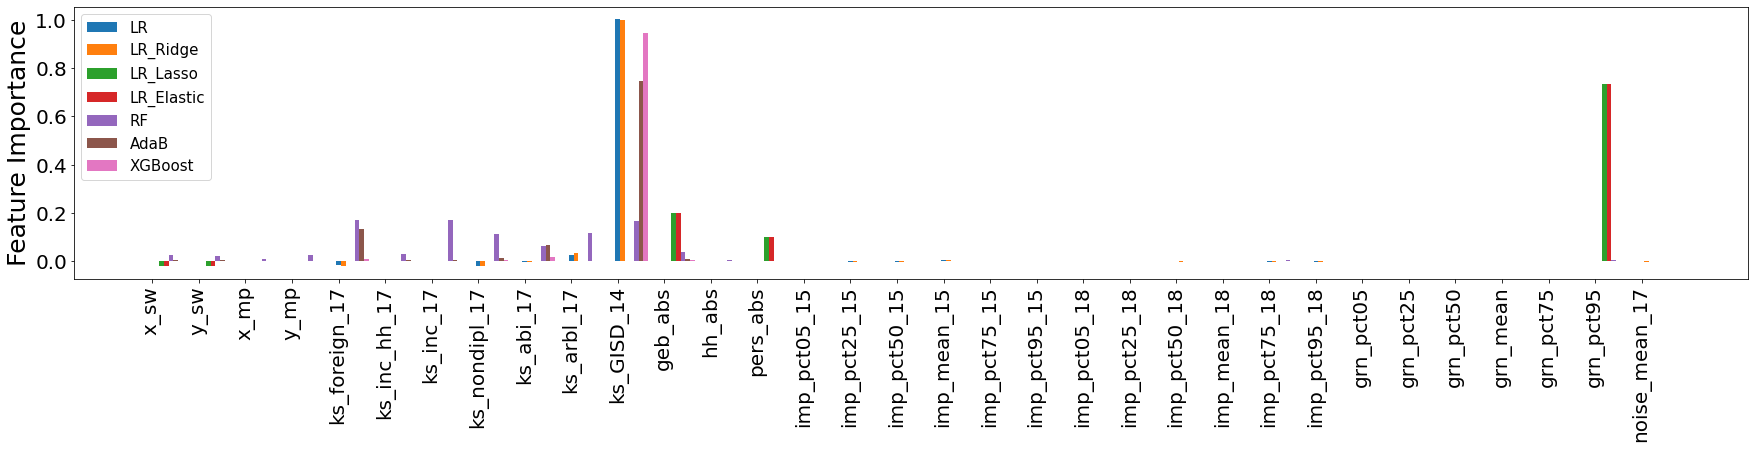

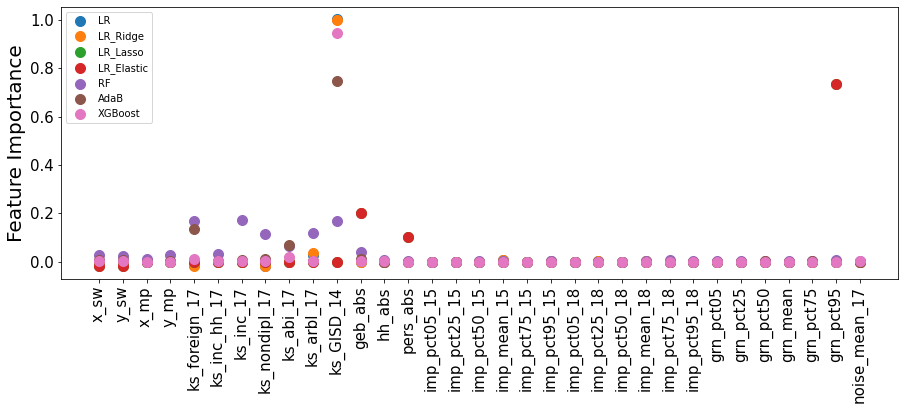

In [365]:
to_plot = feature_imp.drop(['Method'], axis = 1)
test_df = to_plot

for i in range(len(to_plot.columns)):
    if all(to_plot.iloc[:,i] < 0.01):
        test_df = test_df.drop(to_plot.columns[i], axis = 1)

feature_imp_plot_bar(test_df, methods, 20, output_path + 'Plots/Feature_importance_bar_001')
feature_imp_plot_scatter(test_df, methods, 15, output_path + 'Plots/Feature_importance_scatter_001')

feature_imp_plot_bar(to_plot, methods, 20, output_path + 'Plots/Feature_importance_bar_all')
feature_imp_plot_scatter(to_plot, methods, 15, output_path + 'Plots/Feature_importance_scatter_all' )


# Permutaion Feature Importance

In [385]:
def permutation_feature_importance(method, X_train, y_train , X, y, file_path):
    
    if method == 'LR':
        model = linear_model.LinearRegression().fit(X_train, y_train)
    elif method == 'LR_Ridge':
        model = linear_model.RidgeCV(cv = 5).fit(X_train, y_train)
    elif method == 'LR_Lasso':
        model = linear_model.LassoCV(cv = 5, random_state=0).fit(X_train, y_train)
    elif method == 'LR_Elastic':
        model = linear_model.ElasticNetCV(cv = 5, random_state=0).fit(X_train, y_train)
    elif method == 'GAM':
        model = GAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9)).fit(X_train, y_train)
    elif method == 'RF':
        model = RandomForestRegressor(n_estimators= 10, max_depth= 10, random_state= 0, max_features='sqrt').fit(X_train, y_train)
    elif method == 'AdaB':
        model = AdaBoostRegressor(n_estimators= 10, random_state=0).fit(X_train, y_train)
    else:
        model = xgboost.XGBRegressor().fit(X_train, y_train)

    
    result = permutation_importance(
    model, X, y, n_repeats=10, random_state=42, n_jobs=2)

    variable_importances = pd.Series(result.importances_mean, index=X_train.columns)
    plot_feature_importances(variable_importances, method, file_path, 'Permutation')

    plt.show()
    return variable_importances

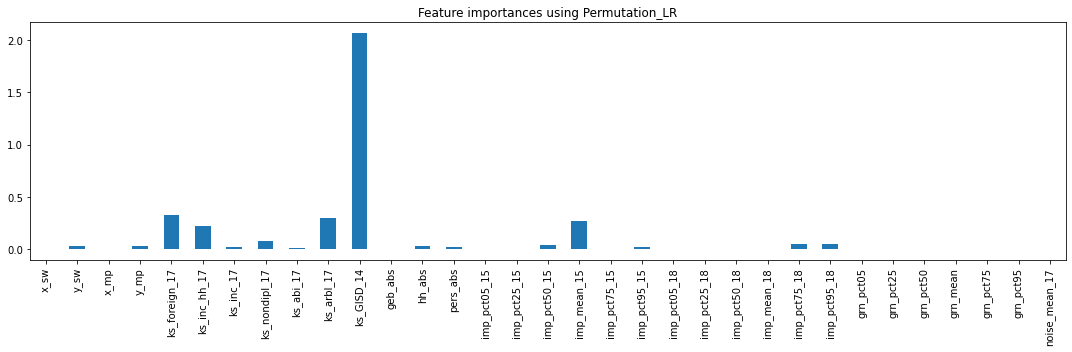

In [384]:
permutation_feature_importance('LR', X_train, y_train , X_test, y_test, output_path + 'Plots/permutation_feature_importance', )

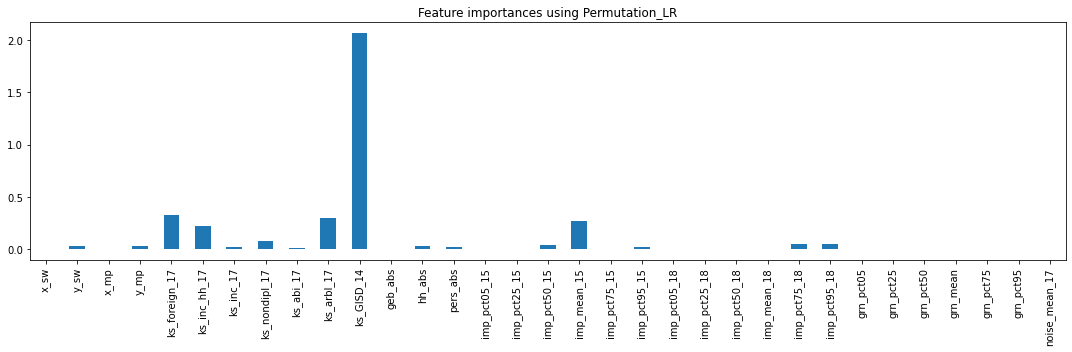

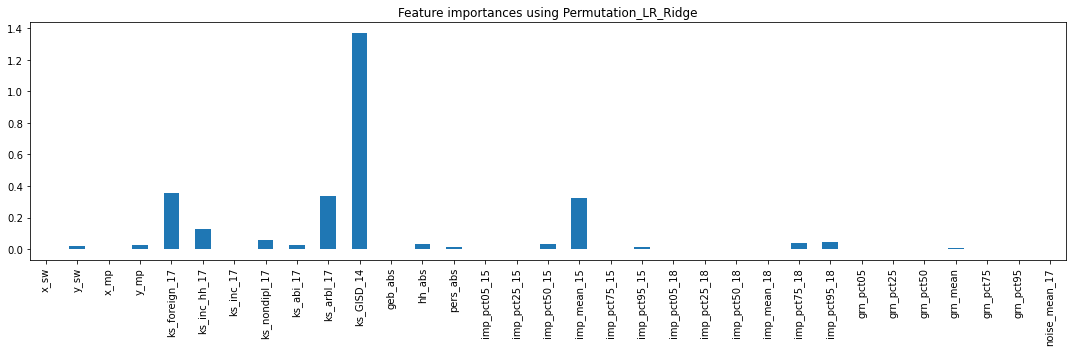

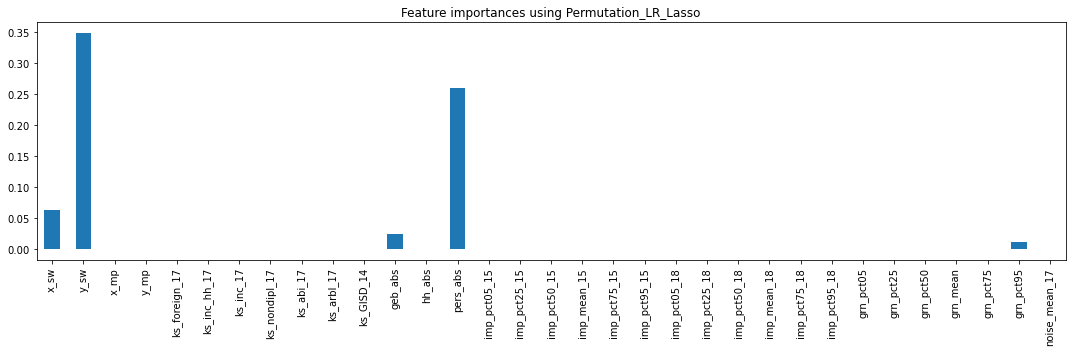

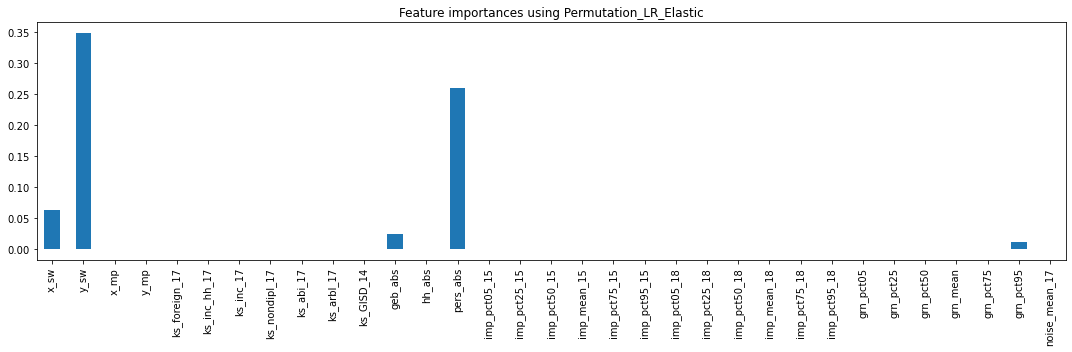

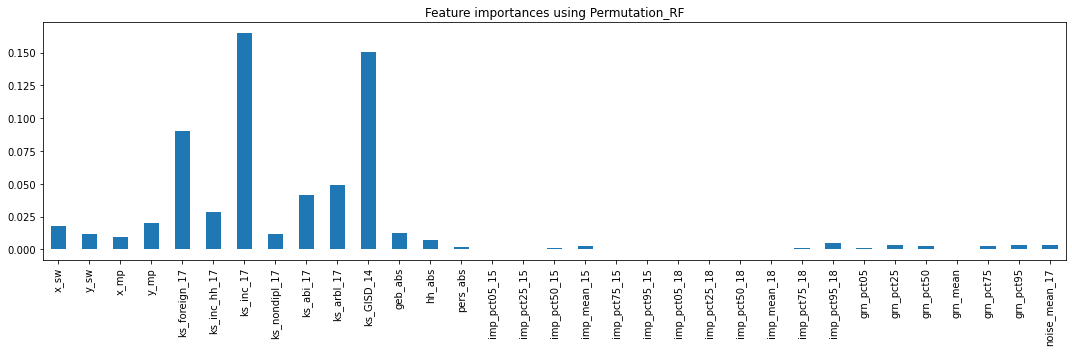

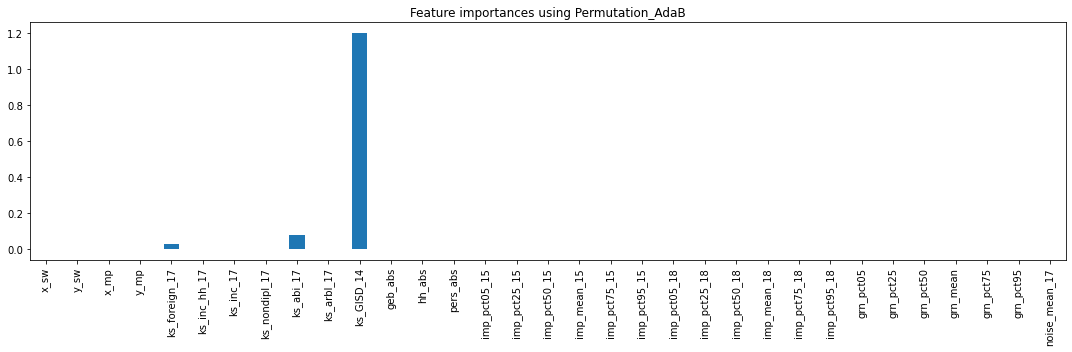

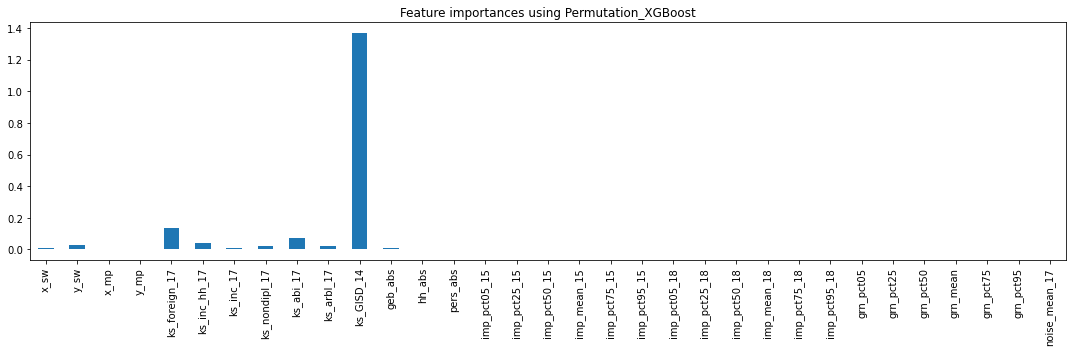

,x_sw,y_sw,x_mp,y_mp,ks_foreign_17,ks_inc_hh_17,ks_inc_17,ks_nondipl_17,ks_abi_17,ks_arbl_17,...,imp_pct75_18,imp_pct95_18,grn_pct05,grn_pct25,grn_pct50,grn_mean,grn_pct75,grn_pct95,noise_mean_17,Method
0,0.000075,0.032031,0.000074,0.031983,0.322483,0.224998,0.018365,0.080882,0.015256,0.295207,...,0.045613,0.051402,-0.000159,0.000223,0.001435,0.006285,0.000351,-0.001382,0.000026,LR
1,-0.000199,0.021110,-0.000351,0.029028,0.354172,0.130117,0.000950,0.059990,0.023794,0.338442,...,0.041965,0.046154,-0.000161,-0.000175,0.001690,0.004458,0.000935,-0.001487,0.000131,LR_Ridge
2,0.064153,0.348802,-0.000013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011793,0.000000,LR_Lasso
3,0.064159,0.348810,-0.000013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011789,0.000000,LR_Elastic
4,0.017742,0.011314,0.009149,0.020349,0.090520,0.028459,0.164804,0.011402,0.041642,0.048740,...,0.000941,0.004771,0.000906,0.003303,0.002679,0.000098,0.002505,0.003073,0.003239,RF
5,0.002490,-0.000493,0.000000,0.002135,0.027344,0.001260,0.001110,0.001322,0.077438,0.000186,...,0.000000,0.000000,0.000000,0.000000,0.000389,0.000000,-0.000387,0.000000,0.000000,AdaB
6,0.011074,0.025109,0.000000,0.000000,0.133246,0.037920,0.006649,0.021414,0.070116,0.020745,...,0.000052,-0.000083,0.001063,0.000080,0.000252,0.000296,0.000122,0.000026,0.000430,XGBoost


In [390]:
feature_imp = pd.DataFrame(columns = features)
# feature_imp['Method'] = None
# 'LR', 'LR_Ridge', 'LR_Lasso', 'LR_Elastic', 'GAM', 'AdaB', 'XGBoost'

methods = ['LR', 'LR_Ridge', 'LR_Lasso', 'LR_Elastic', 'RF', 'AdaB', 'XGBoost']
for i in methods:
    toAppend_imp = permutation_feature_importance(i, X_train, y_train, X_test, y_test, output_path + i + '/' + i + '_permutation_feature_importance', 'Permutatio' )
    feature_imp = feature_imp.append(toAppend_imp, ignore_index=True)

feature_imp['Method'] = methods
feature_imp

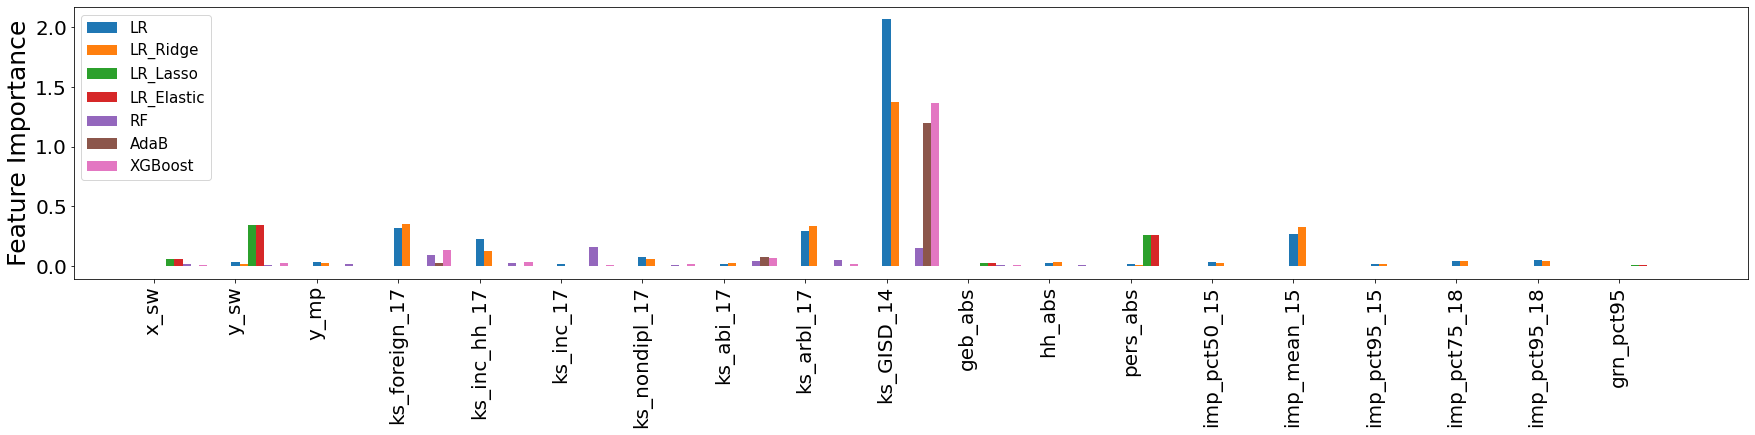

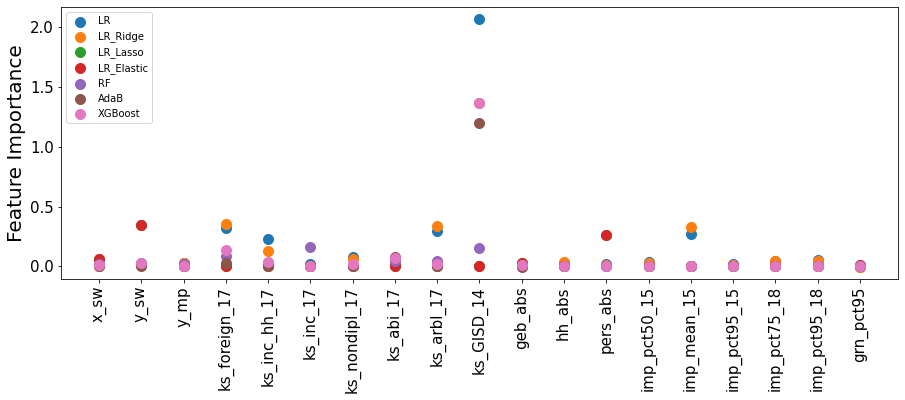

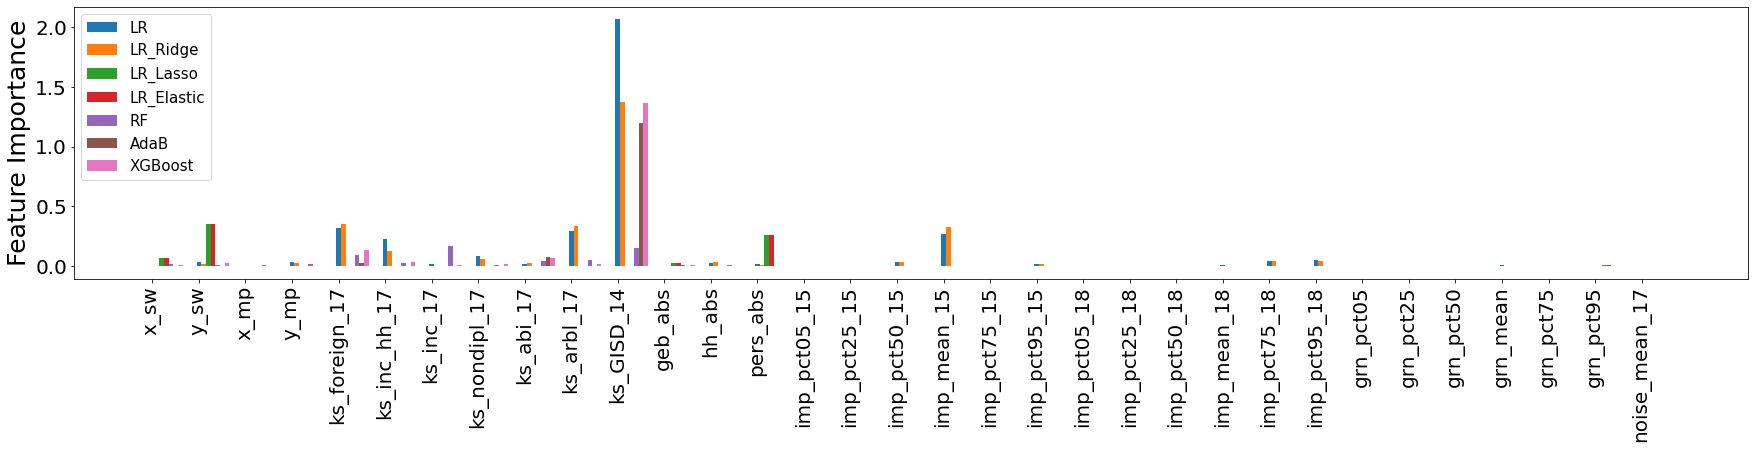

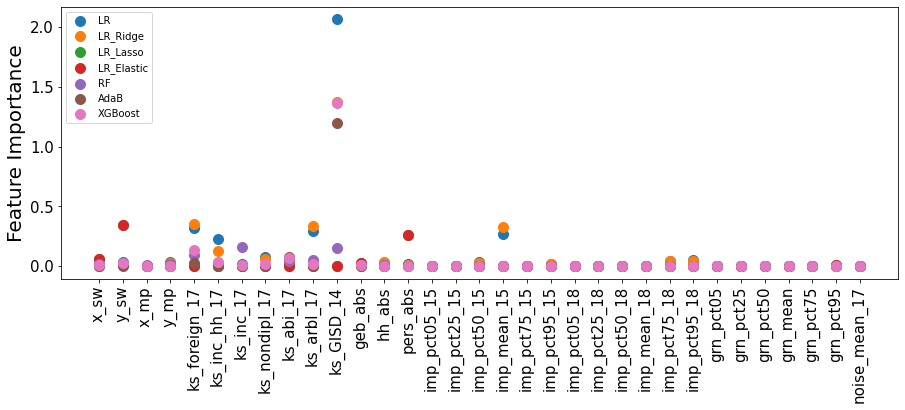

In [391]:
to_plot = feature_imp.drop(['Method'], axis = 1)
test_df = to_plot

for i in range(len(to_plot.columns)):
    if all(to_plot.iloc[:,i] < 0.01):
        test_df = test_df.drop(to_plot.columns[i], axis = 1)

feature_imp_plot_bar(test_df, methods, 20, output_path + 'Plots/Feature_importance_per_bar_001')
feature_imp_plot_scatter(test_df, methods, 10, output_path + 'Plots/Feature_importance_per_scatter_001')

feature_imp_plot_bar(to_plot, methods, 20, output_path + 'Plots/Feature_importance_per_bar_all')
feature_imp_plot_scatter(to_plot, methods, 10, output_path + 'Plots/Feature_importance_per_scatter_all' )

# SHAP

In [10]:
def shap_feature_importance(method, X_train, y_train , X, y, file_path):
    
    if method == 'LR':
        model = linear_model.LinearRegression().fit(X_train, y_train)
    elif method == 'LR_Ridge':
        model = linear_model.RidgeCV(cv = 5).fit(X_train, y_train)
    elif method == 'LR_Lasso':
        model = linear_model.LassoCV(cv = 5, random_state=0).fit(X_train, y_train)
    elif method == 'LR_Elastic':
        model = linear_model.ElasticNetCV(cv = 5, random_state=0).fit(X_train, y_train)
    elif method == 'GAM':
        model = GAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9)).fit(X_train, y_train)
    elif method == 'RF':
        model = RandomForestRegressor(n_estimators= 10, max_depth= 10, random_state= 0, max_features='sqrt').fit(X_train, y_train)
    elif method == 'AdaB':
        model = AdaBoostRegressor(n_estimators= 10, random_state=0).fit(X_train, y_train)
    else:
        model = xgboost.XGBRegressor().fit(X_train, y_train)
    
    if method == 'GAM':
        explainer = shap.explainers.Additive(model.predict, X)
    else:
        explainer = shap.Explainer(model)
        
    shap_values = explainer(X)
    
#     variable_importances = pd.Series(importances, index= X_train.columns)
#     plot_feature_importances(variable_importances, method, output_path + method + '/' + method + '_SHAP_feature_imp_plot', 'SHAP')
    
    return shap_values

In [19]:
def shap_summary_plot(method, shap_values, X, columns, file_path):
    plt.title(method)
    shap.summary_plot(shap_values, features = X_test, feature_names = columns)
    plt.savefig(file_path)
    plt.show()

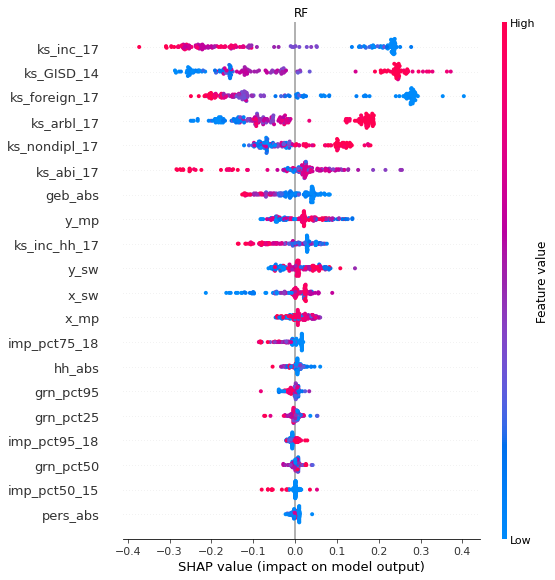

<Figure size 432x288 with 0 Axes>

In [18]:
method = 'RF'
RF_shap_values = shap_feature_importance(method, X_train, y_train, X_test, y_test, output_path + method + '/' + method + '_SHAP_feature_importance')
shap_summary_plot(method, RF_shap_values.values, X_test, X_test.columns, output_path + method + '/' + method + '_SHAP_feature_importance')

In [23]:
feature_imp = pd.DataFrame(columns = features)
# feature_imp['Method'] = None
# 'LR', 'LR_Ridge', 'LR_Lasso', 'LR_Elastic', 'GAM', 'AdaB', 'XGBoost'

methods = ['RF']
for i in methods:
    toAppend_imp = shap_feature_importance(i, X_train, y_train, X_test, y_test, output_path + i + '/' + i + '_permutation_feature_importance')
    feature_imp = feature_imp.append(pd.DataFrame(toAppend_imp.values, columns= features), ignore_index=True)

# feature_imp['Method'] = methods
feature_imp

,x_sw,y_sw,x_mp,y_mp,ks_foreign_17,ks_inc_hh_17,ks_inc_17,ks_nondipl_17,ks_abi_17,ks_arbl_17,...,imp_mean_18,imp_pct75_18,imp_pct95_18,grn_pct05,grn_pct25,grn_pct50,grn_mean,grn_pct75,grn_pct95,noise_mean_17
0,-0.002054,-0.009017,0.021573,0.045938,0.273305,0.027924,0.229480,0.106055,-0.023609,-0.025826,...,0.002725,0.016625,-0.008188,0.013743,-0.001357,-0.003194,0.008017,0.001663,0.007178,0.000717
1,-0.101565,-0.002318,-0.025773,-0.026252,-0.158043,-0.080272,-0.260200,-0.067371,-0.272522,-0.084758,...,0.005685,-0.025197,0.002837,0.007117,0.010206,0.000647,-0.003210,-0.001830,0.003102,-0.006737
2,0.022938,0.006639,0.006557,0.018136,0.282574,0.033191,0.234043,0.121673,0.017531,0.172157,...,0.006936,0.016007,-0.006440,0.000134,-0.003588,-0.002270,0.005437,-0.002902,0.005902,0.001177
3,-0.001655,0.031801,0.031435,0.087624,0.249460,-0.014787,0.211790,0.129249,0.216142,-0.033935,...,0.004839,0.016753,-0.018878,0.001147,-0.007847,0.007598,0.002530,0.000930,0.007608,0.025740
4,-0.099643,0.006759,-0.031052,-0.067018,-0.177240,-0.084192,-0.270777,-0.101809,-0.274844,-0.089572,...,0.000146,0.005973,0.008287,-0.003466,-0.017375,-0.017044,-0.000850,-0.005129,0.000861,0.009487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,0.024836,0.010372,-0.014458,0.017399,0.272524,0.032439,0.232686,0.133405,0.021698,0.184643,...,0.006541,0.016584,-0.006258,0.000635,-0.003803,-0.005998,0.002195,0.000694,0.001814,0.001295
168,-0.007775,0.072450,-0.012344,0.101353,-0.133067,0.066052,-0.146283,-0.050438,0.086574,-0.010755,...,-0.000662,0.004483,0.011042,0.002832,0.000971,0.010786,0.006869,0.012190,-0.011665,0.001689
169,0.041843,-0.041846,0.038833,-0.035164,-0.128548,-0.057822,-0.199967,-0.079076,0.065170,-0.196679,...,0.008781,0.002384,-0.009793,-0.009409,-0.008058,0.022078,0.004552,0.003085,-0.013582,0.001691
170,0.023488,0.043815,-0.001623,0.040046,0.258874,0.030332,0.222680,0.095759,0.017452,0.182376,...,0.003297,0.016389,-0.006580,-0.000554,-0.001275,0.003076,0.002377,0.001801,0.004585,0.001203
